In [1]:
#mount gdrive to get the data
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import library
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, make_scorer, accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
import keras
from keras.models import Sequential
from keras.layers import Dense

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#import pandas as pd 
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/corona_tested_individuals_ver_0083.english.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#print dataset
dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [5]:
#print unique values
print("Unique categories in the column 'cough'", dataset['cough'].unique())
print("Count of categories in the column 'cough' \n", dataset["cough"].value_counts())
print("Unique categories in the column 'fever'", dataset['fever'].unique())
print("Count of categories in the column 'fever' \n", dataset["fever"].value_counts())
print("Unique categories in the column 'sore'", dataset['sore_throat'].unique())
print("Count of categories in the column 'sore_throat' \n", dataset["sore_throat"].value_counts())
print("Unique categories in the column 'shortness_of_breath'", dataset['shortness_of_breath'].unique())
print("Count of categories in the column 'shortness_of_breath' \n", dataset["shortness_of_breath"].value_counts())
print("Unique categories in the column 'head_ache'", dataset['head_ache'].unique())
print("Count of categories in the column 'head_ache' \n", dataset["head_ache"].value_counts())
print("Unique categories in the column 'corona_result'", dataset['corona_result'].unique())
print("Count of categories in the column 'corona_result' \n", dataset["corona_result"].value_counts())
print("Unique categories in the column 'age_60_and_above'", dataset['age_60_and_above'].unique())
print("Count of categories in the column 'age_60_and_above' \n", dataset["age_60_and_above"].value_counts())
print("Unique categories in the column 'gender'", dataset['gender'].unique())
print("Count of categories in the column 'gender' \n", dataset["gender"].value_counts())
print("Unique categories in the column 'test_indication'", dataset['test_indication'].unique())
print("Count of categories in the column 'test_indication' \n", dataset["test_indication"].value_counts())

Unique categories in the column 'cough' [0 1]
Count of categories in the column 'cough' 
 0    2631258
1     111338
Name: cough, dtype: int64
Unique categories in the column 'fever' [0 1]
Count of categories in the column 'fever' 
 0    2645600
1      96996
Name: fever, dtype: int64
Unique categories in the column 'sore' [0 1]
Count of categories in the column 'sore_throat' 
 0    2712512
1      30084
Name: sore_throat, dtype: int64
Unique categories in the column 'shortness_of_breath' [0 1]
Count of categories in the column 'shortness_of_breath' 
 0    2731579
1      11017
Name: shortness_of_breath, dtype: int64
Unique categories in the column 'head_ache' [0 1]
Count of categories in the column 'head_ache' 
 0    2682655
1      59941
Name: head_ache, dtype: int64
Unique categories in the column 'corona_result' ['negative' 'positive' 'other']
Count of categories in the column 'corona_result' 
 negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [6]:
#print columns
dataset.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [7]:
# Replacing the categorical values into binary values

#1#Gender drop,age drop and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})

#2#Gender drop,age yes and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['age_60_and_above'].fillna(1, inplace = True)

#3#Gender drop,age no and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['age_60_and_above'].fillna(0, inplace = True)

#4#Gender female,age drop and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)

#5#Gender female,age yes and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)
#dataset['age_60_and_above'].fillna(1, inplace = True)

#6#Gender female,age no and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)
#dataset['age_60_and_above'].fillna(0, inplace = True)

#7#Gender male,age drop and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)

#8#Gender male,age yes and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)
#dataset['age_60_and_above'].fillna(1, inplace = True)

#9#Gender male,age no and other negative
#dataset = dataset.replace({'negative':0,'positive':1, 'other':0, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)
#dataset['age_60_and_above'].fillna(0, inplace = True)

#10#Gender drop,age drop and other drop
dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#Replacing 'other' into NaN values
dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#11#Gender drop,age yes and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['age_60_and_above'].fillna(1, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#12#Gender drop,age no and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['age_60_and_above'].fillna(0, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#13#Gender female,age drop and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#14#Gender female,age yes and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)
#dataset['age_60_and_above'].fillna(1, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#15#Gender female,age no and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(1, inplace = True)
#dataset['age_60_and_above'].fillna(0, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#16#Gender male,age drop and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#17#Gender male,age yes and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)
#dataset['age_60_and_above'].fillna(1, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)

#18#Gender male,age no and other drop
#dataset = dataset.replace({'negative':0,'positive':1, 'No':0, 'Yes':1, 'male':0, 'female':1})
#dataset['gender'].fillna(0, inplace = True)
#dataset['age_60_and_above'].fillna(0, inplace = True)
#Replacing 'other' into NaN values
#dataset.replace(to_replace='other', inplace=True, value=np.NaN)


In [8]:
dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
1,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Other
2,2020-11-12,0,0,0,0,0,0.0,1.0,1.0,Other
3,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
4,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,0.0,NaN,1.0,Other
2742592,2020-03-11,0,0,0,0,0,0.0,NaN,1.0,Other
2742593,2020-03-11,0,0,0,0,0,NaN,NaN,0.0,Other
2742594,2020-03-11,0,0,0,0,0,0.0,NaN,1.0,Other


In [9]:
#checkin null columns
dataset.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result           41218
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [10]:
#drop null values
dataset = dataset.dropna()
dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
1,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Other
2,2020-11-12,0,0,0,0,0,0.0,1.0,1.0,Other
3,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
4,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,1.0,0.0,1.0,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,0.0,0.0,1.0,Other
2731643,2020-03-20,1,0,0,0,0,0.0,0.0,0.0,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,0.0,0.0,1.0,Other


In [11]:
dataset.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [12]:
# now call .get_dummies() as usual
dummiesData = pd.get_dummies(dataset["test_indication"],prefix='test_indication')
dataset = dataset.join(dummiesData)
dataset.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication', 'test_indication_Abroad',
       'test_indication_Contact with confirmed', 'test_indication_Other'],
      dtype='object')

In [13]:
#drop unnecessary columns
dataset.drop('test_date', axis = 1, inplace=True)
dataset.drop('test_indication', axis = 1, inplace=True)
dataset.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication_Abroad',
       'test_indication_Contact with confirmed', 'test_indication_Other'],
      dtype='object')

In [14]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [15]:
# Viewing the details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151898 entries, 0 to 2731647
Data columns (total 11 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   cough                                   int64  
 1   fever                                   int64  
 2   sore_throat                             int64  
 3   shortness_of_breath                     int64  
 4   head_ache                               int64  
 5   corona_result                           float64
 6   age_60_and_above                        float64
 7   gender                                  float64
 8   test_indication_Abroad                  uint8  
 9   test_indication_Contact with confirmed  uint8  
 10  test_indication_Other                   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 233.9 MB


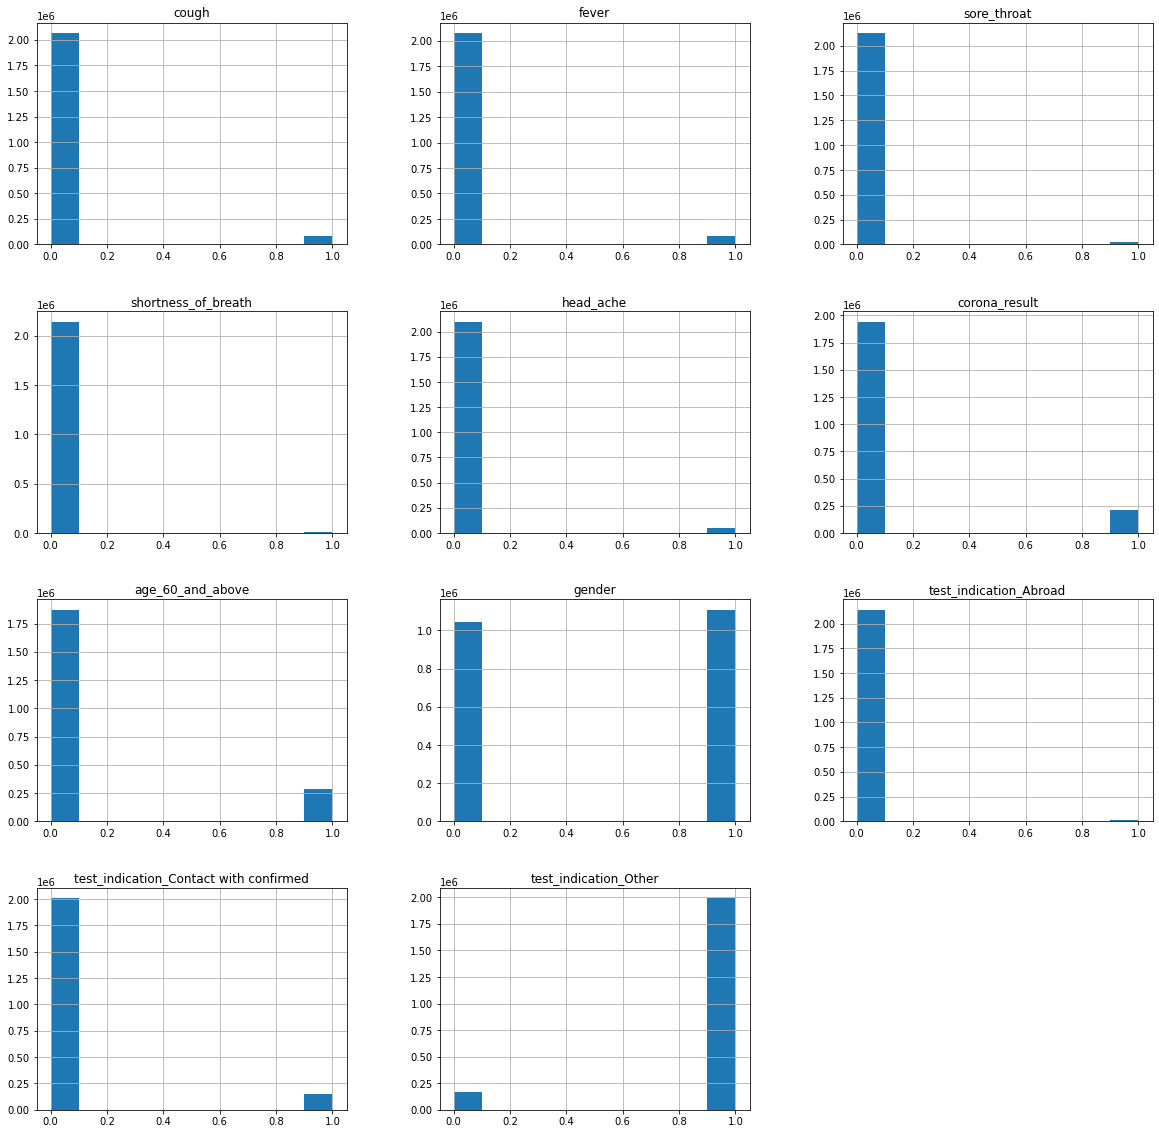

In [16]:
dataset.hist(figsize = (20,20));

In [17]:
# Features
X = dataset.drop('corona_result', axis = 1) # selecting all columns except the corona_result
# corona_result variable
y = dataset['corona_result']

In [18]:
#Balancing skewed data
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X,y)

print(f'''Shape of x before SMOTE: {X.shape}
      #Shape of x after SMOTE: {X_sm.shape}''')

print(f'''Shape of y before SMOTE: {y.shape}
      #Shape of y after SMOTE: {y_sm.shape}''')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of x before SMOTE: (2151898, 10)
      #Shape of x after SMOTE: (3886344, 10)
Shape of y before SMOTE: (2151898,)
      #Shape of y after SMOTE: (3886344,)


In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [20]:
# prepare the cross-validation procedure
allkfold = KFold(n_splits=10, random_state=42)

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc'}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [21]:
# create model
dtclf = DecisionTreeClassifier(random_state=42)
# evaluate model
dtclfscores = cross_val_score(dtclf, X_sm, y_sm, scoring='accuracy', cv=allkfold, n_jobs=-1)
dtclfrecall = cross_val_score(dtclf, X_sm, y_sm, scoring='recall', cv=allkfold, n_jobs=-1)
dtclfpreci = cross_val_score(dtclf, X_sm, y_sm, scoring='precision', cv=allkfold, n_jobs=-1)

print(dtclfscores)
print(dtclfscores.mean())

print(dtclfrecall)
print(dtclfrecall.mean())

print(dtclfpreci)
print(dtclfpreci.mean())

[0.94799233 0.88098859 0.91943855 0.94273804 0.94354586 0.74818724
 0.65133004 0.65022103 0.65171086 0.64971155]
0.7985864100522566
[0.74542758 0.5242437  0.52164352 0.79925014 0.74851632 0.66899617
 0.65133004 0.65022103 0.65171086 0.64971155]
0.6611050918290566
[0.46560774 0.65733258 0.69938023 0.71775367 0.58841988 0.79067998
 1.         1.         1.         1.        ]
0.7919174072612023


In [22]:
dtclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [23]:
dtclf.score(X_test,y_test)

0.8007781089944408

In [24]:
dtclf.score(X_train,y_train)

0.8007950917877503

In [25]:
# Predicting the output predictions
dtclfy_pred = dtclf.predict(X_test).round()

Text(69.0, 0.5, 'Truth Values')

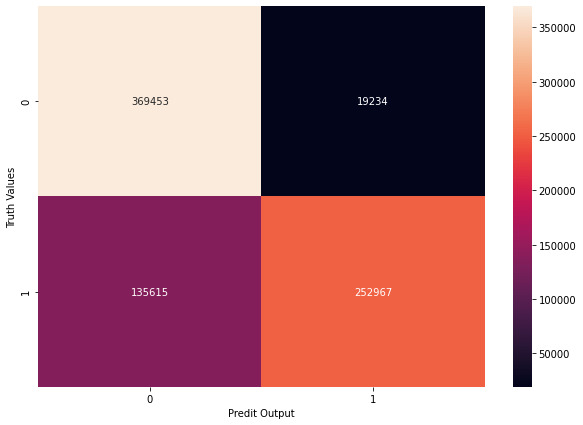

In [26]:
dtclf_matrix = confusion_matrix(y_test, dtclfy_pred)
plt.figure(figsize=(10,7))
sns.heatmap(dtclf_matrix, annot=True, fmt='d')
plt.xlabel('Predit Output')
plt.ylabel('Truth Values')

In [27]:
print(classification_report(y_test, dtclfy_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83    388687
         1.0       0.93      0.65      0.77    388582

    accuracy                           0.80    777269
   macro avg       0.83      0.80      0.80    777269
weighted avg       0.83      0.80      0.80    777269



In [28]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [29]:
print(result_table)

Empty DataFrame
Columns: [classifiers, fpr, tpr, auc]
Index: []


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# fpr, tpr, thresholds = roc_curve(y_test, dtclfy_pred)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for DT')
# plt.show()
fpr, tpr, _ = roc_curve(y_test,  dtclfy_pred)
auc = roc_auc_score(y_test, dtclfy_pred)
    
result_table = result_table.append({'classifiers': 'DT',
                                        'fpr':fpr, 
                                        'tpr':tpr, 'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)

In [31]:
print(result_table)

  classifiers  ...       auc
0          DT  ...  0.800758

[1 rows x 4 columns]


In [32]:
# create model
rclf = RandomForestClassifier()
# evaluate model
rclfscores = cross_val_score(rclf, X_sm, y_sm, scoring='accuracy', cv=allkfold, n_jobs=-1)
# report performance
print(rclfscores)
print(rclfscores.mean())

[0.94798976 0.88098859 0.91943597 0.94273547 0.94354328 0.74819496
 0.65134034 0.65023132 0.65171344 0.64972699]
0.7985900124153333


In [33]:
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rclf.score(X_test,y_test)

0.800781968662072

In [35]:
rclf.score(X_train,y_train)

0.8007950917877503

In [36]:
rclfy_pred = rclf.predict(X_test).round()

Text(69.0, 0.5, 'Truth Values')

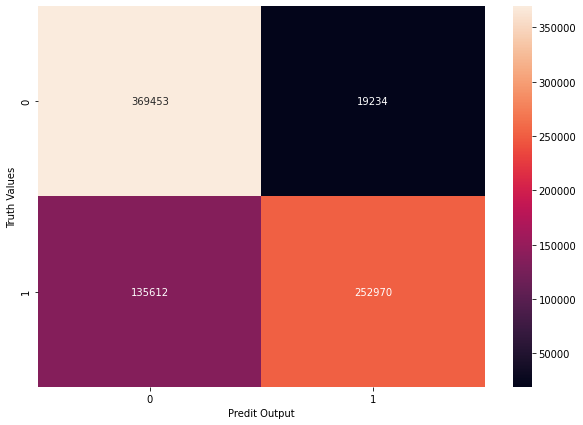

In [37]:
rclf_matrix = confusion_matrix(y_test, rclfy_pred)
plt.figure(figsize=(10,7))
sns.heatmap(rclf_matrix, annot=True, fmt='d')
plt.xlabel('Predit Output')
plt.ylabel('Truth Values')

In [38]:
print(classification_report(y_test, rclfy_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83    388687
         1.0       0.93      0.65      0.77    388582

    accuracy                           0.80    777269
   macro avg       0.83      0.80      0.80    777269
weighted avg       0.83      0.80      0.80    777269



In [39]:
# fpr, tpr, thresholds = roc_curve(y_test, rclfy_pred)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for RF')
# plt.show()

fpr, tpr, _ = roc_curve(y_test,  rclfy_pred)
auc = roc_auc_score(y_test, rclfy_pred)
    
result_table = result_table.append({'classifiers': 'RF',
                                        'fpr':fpr, 
                                        'tpr':tpr, 'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)

In [40]:
print(result_table)

  classifiers  ...       auc
0          DT  ...  0.800758
1          RF  ...  0.800762

[2 rows x 4 columns]


In [41]:
#create model
lgr = LogisticRegression()
#evaluate model
lgrscores = cross_val_score(lgr, X_sm, y_sm, scoring='accuracy', cv=allkfold, n_jobs=-1)
#report performance
print(lgrscores)
print(lgrscores.mean())

[0.94784566 0.88106578 0.91946943 0.94287442 0.94374656 0.74821297
 0.62757247 0.62912406 0.63043378 0.62879213]
0.7899137257019996


In [42]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lgr.score(X_test,y_test)

0.7978602002652878

In [44]:
lgr.score(X_train,y_train)

0.797635952815548

In [45]:
lgry_pred = lgr.predict(X_test).round()

Text(69.0, 0.5, 'Truth Values')

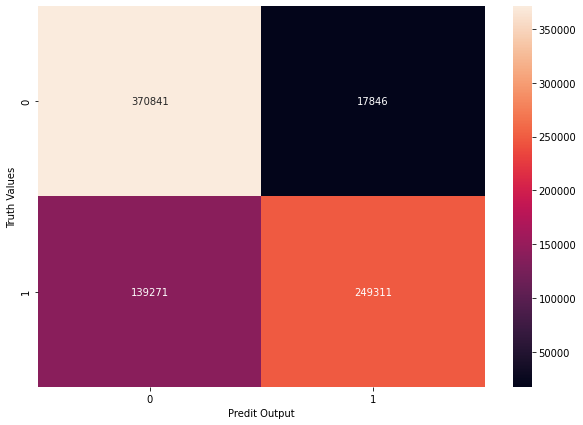

In [46]:
lgrc_matrix = confusion_matrix(y_test, lgry_pred)
plt.figure(figsize=(10,7))
sns.heatmap(lgrc_matrix, annot=True, fmt='d')
plt.xlabel('Predit Output')
plt.ylabel('Truth Values')

In [47]:
print(classification_report(y_test, lgry_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83    388687
         1.0       0.93      0.64      0.76    388582

    accuracy                           0.80    777269
   macro avg       0.83      0.80      0.79    777269
weighted avg       0.83      0.80      0.79    777269



In [48]:
# fpr, tpr, thresholds = roc_curve(y_test, lgry_pred)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for LR')
# plt.show()

fpr, tpr, _ = roc_curve(y_test,  lgry_pred)
auc = roc_auc_score(y_test, lgry_pred)
    
result_table = result_table.append({'classifiers': 'LR',
                                        'fpr':fpr, 
                                        'tpr':tpr, 'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)

In [49]:
print(result_table)

  classifiers  ...       auc
0          DT  ...  0.800758
1          RF  ...  0.800762
2          LR  ...  0.797839

[3 rows x 4 columns]


In [50]:
# create model
gnbclf = GaussianNB()
# evaluate model
gnbclfscores = cross_val_score(gnbclf, X_sm, y_sm, scoring='accuracy', cv=allkfold, n_jobs=-1)
# report performance
print(gnbclfscores)
print(gnbclfscores.mean())

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.9475266  0.8806618  0.91913492 0.94227231 0.94306468 0.74821297
 0.65372304 0.65249824 0.65400351 0.65198361]
0.7993081692297546


In [51]:
gnbclf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
gnbclf.score(X_test,y_test)

0.7992754117300446

In [53]:
gnbclf.score(X_train,y_train)

0.7991743525003417

In [54]:
gnbclfy_pred = gnbclf.predict(X_test).round()

Text(69.0, 0.5, 'Truth Values')

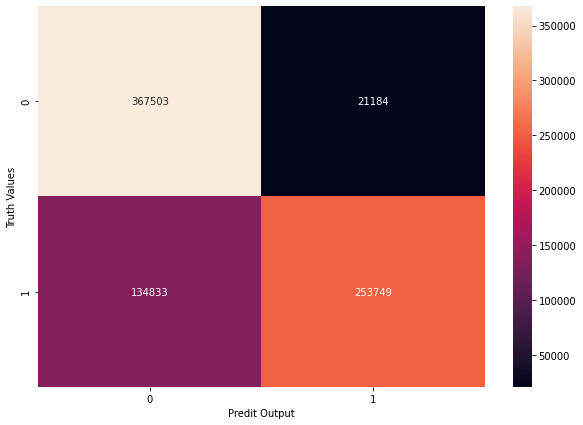

In [55]:
gnbclf_matrix = confusion_matrix(y_test, gnbclfy_pred)
plt.figure(figsize=(10,7))
sns.heatmap(gnbclf_matrix, annot=True, fmt='d')
plt.xlabel('Predit Output')
plt.ylabel('Truth Values')

In [56]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, gnbclfy_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82    388687
         1.0       0.92      0.65      0.76    388582

    accuracy                           0.80    777269
   macro avg       0.83      0.80      0.79    777269
weighted avg       0.83      0.80      0.79    777269



In [57]:
# fpr, tpr, thresholds = roc_curve(y_test, gnbclfy_pred)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for NB')
# plt.show()

fpr, tpr, _ = roc_curve(y_test,  gnbclfy_pred)
auc = roc_auc_score(y_test, gnbclfy_pred)
    
result_table = result_table.append({'classifiers': 'NB',
                                        'fpr':fpr, 
                                        'tpr':tpr, 'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)

In [58]:
print(result_table)

  classifiers  ...       auc
0          DT  ...  0.800758
1          RF  ...  0.800762
2          LR  ...  0.797839
3          NB  ...  0.799256

[4 rows x 4 columns]


In [59]:
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=10, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Training the model
result = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/10
62182/62182 - 74s - loss: 0.4617 - accuracy: 0.8007 - val_loss: 0.4614 - val_accuracy: 0.8001
Epoch 2/10
62182/62182 - 71s - loss: 0.4606 - accuracy: 0.8008 - val_loss: 0.4609 - val_accuracy: 0.8003
Epoch 3/10
62182/62182 - 66s - loss: 0.4604 - accuracy: 0.8009 - val_loss: 0.4612 - val_accuracy: 0.8003
Epoch 4/10
62182/62182 - 71s - loss: 0.4603 - accuracy: 0.8009 - val_loss: 0.4609 - val_accuracy: 0.8003
Epoch 5/10
62182/62182 - 69s - loss: 0.4602 - accuracy: 0.8009 - val_loss: 0.4615 - val_accuracy: 0.8003
Epoch 6/10
62182/62182 - 69s - loss: 0.4601 - accuracy: 0.8008 - val_loss: 0.4616 - val_accuracy: 0.8002
Epoch 7/10
62182/62182 - 70s - loss: 0.4601 - accuracy: 0.8009 - val_loss: 0.4608 - val_accuracy: 0.8003
Epoch 8/10
62182/62182 - 70s - loss: 0.4601 - accuracy: 0.8009 - val_loss: 0.4612 - val_accuracy: 0.8003
Epoch 9/10
62182/62182 - 70s - loss: 0.4601 - accuracy: 0.8009 - val_loss: 0.4608 - val_accuracy: 0.8003
Epoch 10/10
62182/62182 - 66s - loss: 0.4601 - accuracy

In [62]:
# Predicting the output predictions
nny_pred = model.predict(X_test).round()

Text(69.0, 0.5, 'Truth Values')

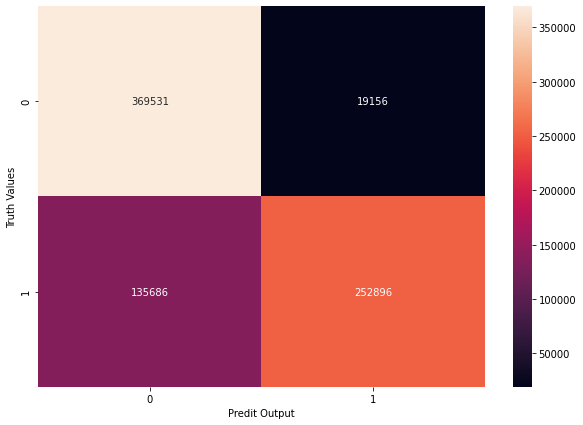

In [63]:
nn_matrix = confusion_matrix(y_test, nny_pred)
plt.figure(figsize=(10,7))
sns.heatmap(nn_matrix, annot=True, fmt='d')
plt.xlabel('Predit Output')
plt.ylabel('Truth Values')

In [64]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, nny_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83    388687
         1.0       0.93      0.65      0.77    388582

    accuracy                           0.80    777269
   macro avg       0.83      0.80      0.80    777269
weighted avg       0.83      0.80      0.80    777269



In [65]:
# fpr, tpr, thresholds = roc_curve(y_test, nny_pred)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for NN')
# plt.show()

fpr, tpr, _ = roc_curve(y_test,  nny_pred)
auc = roc_auc_score(y_test, nny_pred)
    
result_table = result_table.append({'classifiers': 'NN',
                                        'fpr':fpr, 
                                        'tpr':tpr, 'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [66]:
print(result_table)

                                          fpr  ...       auc
classifiers                                    ...          
DT            [0.0, 0.04948454669181115, 1.0]  ...  0.800758
RF            [0.0, 0.04948454669181115, 1.0]  ...  0.800762
LR            [0.0, 0.04591354997723104, 1.0]  ...  0.797839
NB             [0.0, 0.0545014368888077, 1.0]  ...  0.799256
NN           [0.0, 0.049283871083931285, 1.0]  ...  0.800767

[5 rows x 3 columns]


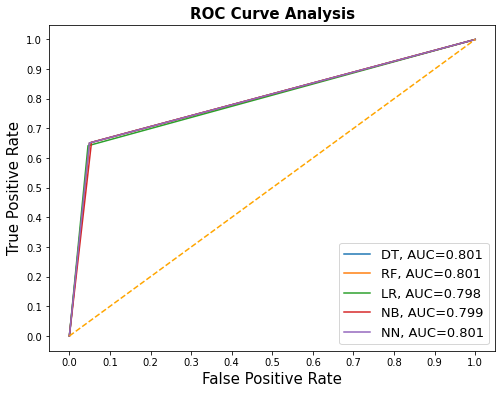

In [67]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [68]:
# Get the loss and accuracy of the model by evaluation
loss, acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

24290/24290 [==============================] - 25s 1ms/step - loss: 0.4600 - accuracy: 0.8008
loss: 46.00%
accuracy: 80.08%


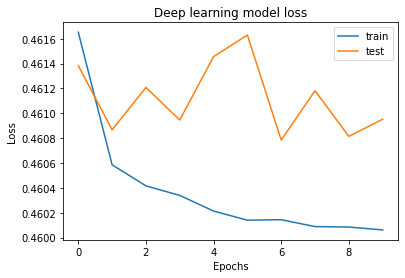

In [69]:
# summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('Deep learning model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()

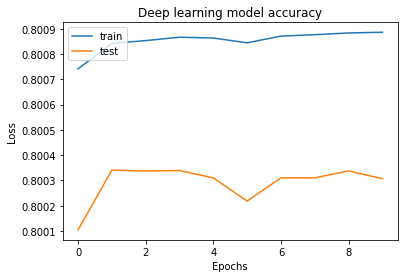

In [70]:
# summarize the result and plot the training and test loss
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])

# Set the parameters
plt.title('Deep learning model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

# Display the plots
plt.show()